In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

import seaborn as sns
from datetime import datetime, timedelta

In [3]:
#Lister les data presentent dans le dossier
os.listdir('../data/')

['.DS_Store', 'glucose_12-10-2019_export.csv', '.ipynb_checkpoints']

In [4]:
path_ = '../data/glucose_12-10-2019_export.csv'

In [7]:
df_full = pd.read_csv(path_, sep=';')

In [8]:
df_full.head()

,Horodatage de l'appareil,Type d'enregistrement,Historique de la glycémie mg/dL,Numérisation de la glycémie mg/dL,Insuline à action rapide sans valeur numérique,Insuline à action rapide (unités),Alimentation sans valeur numérique,Glucides (grammes),Glucides (portions),Insuline à action longue sans valeur numérique,Insuline à action longue (unités),Remarques,Glycémie par bandelette mg/dL,Cétone mmol/L,Insuline repas (unités),Correction insuline (unités),Insuline modifiée par l'utilisateur (unités)
0,12-04-2019 02:26 PM,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-04-2019 02:27 PM,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-04-2019 03:16 PM,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-04-2019 03:17 PM,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-04-2019 05:15 PM,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_full['Date'] = pd.to_datetime(df_full['Horodatage de l\'appareil'])
df_full['DateCp'] = df_full['Date']
df_full = df_full.sort_values(by='Date',  ascending=False)

In [10]:
df_full.head(10)

,Horodatage de l'appareil,Type d'enregistrement,Historique de la glycémie mg/dL,Numérisation de la glycémie mg/dL,Insuline à action rapide sans valeur numérique,Insuline à action rapide (unités),Alimentation sans valeur numérique,Glucides (grammes),Glucides (portions),Insuline à action longue sans valeur numérique,Insuline à action longue (unités),Remarques,Glycémie par bandelette mg/dL,Cétone mmol/L,Insuline repas (unités),Correction insuline (unités),Insuline modifiée par l'utilisateur (unités),Date,Date2
20973,12-10-2019 08:01 PM,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 20:01:00,2019-12-10 20:01:00
21385,12-10-2019 08:01 PM,5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 20:01:00,2019-12-10 20:01:00
18807,12-10-2019 08:01 PM,1,NaN,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 20:01:00,2019-12-10 20:01:00
20974,12-10-2019 08:01 PM,4,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 20:01:00,2019-12-10 20:01:00
16516,12-10-2019 07:37 PM,0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 19:37:00,2019-12-10 19:37:00
16515,12-10-2019 07:22 PM,0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 19:22:00,2019-12-10 19:22:00
16514,12-10-2019 07:07 PM,0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 19:07:00,2019-12-10 19:07:00
18806,12-10-2019 06:56 PM,1,NaN,174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 18:56:00,2019-12-10 18:56:00
16513,12-10-2019 06:52 PM,0,169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 18:52:00,2019-12-10 18:52:00
16512,12-10-2019 06:37 PM,0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 18:37:00,2019-12-10 18:37:00


In [12]:
df_full['Type d\'enregistrement'].unique()

#6 : 
#0 : Enregistrement Glucose
#1 : 
#4 : Insuline
#5 : Repas

array([4, 5, 1, 0, 6])

In [13]:
end_date = '2019-12-11'
start_date = '2019-12-01'

#greater than the start date and smaller than the end date
mask = (df_full['Date'] > start_date) & (df_full['Date'] <= end_date)
df_sub = df_full.loc[mask]

In [14]:
df_sub.head()

,Horodatage de l'appareil,Type d'enregistrement,Historique de la glycémie mg/dL,Numérisation de la glycémie mg/dL,Insuline à action rapide sans valeur numérique,Insuline à action rapide (unités),Alimentation sans valeur numérique,Glucides (grammes),Glucides (portions),Insuline à action longue sans valeur numérique,Insuline à action longue (unités),Remarques,Glycémie par bandelette mg/dL,Cétone mmol/L,Insuline repas (unités),Correction insuline (unités),Insuline modifiée par l'utilisateur (unités),Date,Date2
20973,12-10-2019 08:01 PM,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 20:01:00,2019-12-10 20:01:00
21385,12-10-2019 08:01 PM,5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 20:01:00,2019-12-10 20:01:00
18807,12-10-2019 08:01 PM,1,NaN,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 20:01:00,2019-12-10 20:01:00
20974,12-10-2019 08:01 PM,4,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 20:01:00,2019-12-10 20:01:00
16516,12-10-2019 07:37 PM,0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 19:37:00,2019-12-10 19:37:00


In [15]:
df_glucose = df_sub[df_sub['Type d\'enregistrement'] == 0]
df_repas = df_sub[df_sub['Type d\'enregistrement'] == 5]
df_insuline = df_sub[df_sub['Type d\'enregistrement'] == 4]

df_insuline = df_insuline[['Date', 'DateCp', 'Insuline à action longue (unités)', 'Insuline à action rapide (unités)']]
df_repas = df_repas[['Type d\'enregistrement', 'Horodatage de l\'appareil' , 'Date', 'DateCp']]

df_glucose.set_index('Date', inplace=True)
df_repas.set_index('Date', inplace=True)
df_insuline.set_index('Date', inplace=True)

df_glucose['Day'] = df_glucose['DateCp'].apply(lambda x : x.date())
df_repas['Day'] = df_repas['DateCp'].apply(lambda x : x.date())
df_insuline['Day'] = df_insuline['DateCp'].apply(lambda x : x.date())

df_glucose['Time'] = df_glucose['DateCp'].apply(lambda x : x.time())
df_repas['Time'] = df_repas['DateCp'].apply(lambda x : x.time())
df_insuline['Time'] = df_insuline['DateCp'].apply(lambda x : x.time())

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [215]:
df_insuline.head()

,Date2,Insuline à action longue (unités),Insuline à action rapide (unités),Day,Time
Date,,,,,
2019-12-10 20:01:00,2019-12-10 20:01:00,6.0,NaN,2019-12-10,20:01:00
2019-12-10 20:01:00,2019-12-10 20:01:00,NaN,7.0,2019-12-10,20:01:00
2019-12-10 12:58:00,2019-12-10 12:58:00,NaN,10.0,2019-12-10,12:58:00
2019-12-10 09:06:00,2019-12-10 09:06:00,14.0,NaN,2019-12-10,09:06:00
2019-12-10 09:06:00,2019-12-10 09:06:00,NaN,10.0,2019-12-10,09:06:00


In [144]:
df_glucose.head()

,Appareil,Numéro de série,Horodatage de l'appareil,Type d'enregistrement,Historique de la glycémie mg/dL,Numérisation de la glycémie mg/dL,Insuline à action rapide sans valeur numérique,Insuline à action rapide (unités),Alimentation sans valeur numérique,Glucides (grammes),...,Insuline à action longue (unités),Remarques,Glycémie par bandelette mg/dL,Cétone mmol/L,Insuline repas (unités),Correction insuline (unités),Insuline modifiée par l'utilisateur (unités),Date2,Day,Time
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-10 19:37:00,FreeStyle Libre,JGGW189-T1418,12-10-2019 07:37 PM,0,150.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 19:37:00,2019-12-10,19:37:00
2019-12-10 19:22:00,FreeStyle Libre,JGGW189-T1418,12-10-2019 07:22 PM,0,156.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 19:22:00,2019-12-10,19:22:00
2019-12-10 19:07:00,FreeStyle Libre,JGGW189-T1418,12-10-2019 07:07 PM,0,166.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 19:07:00,2019-12-10,19:07:00
2019-12-10 18:52:00,FreeStyle Libre,JGGW189-T1418,12-10-2019 06:52 PM,0,169.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 18:52:00,2019-12-10,18:52:00
2019-12-10 18:37:00,FreeStyle Libre,JGGW189-T1418,12-10-2019 06:37 PM,0,150.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-10 18:37:00,2019-12-10,18:37:00


In [145]:
df_repas['Date+2H'] = df_repas['DateCp'].apply(lambda x : x + timedelta(hours=2))
df_repas['Date+4H'] = df_repas['DateCp'].apply(lambda x : x + timedelta(hours=4))
df_repas.head()

,Type d'enregistrement,Horodatage de l'appareil,Date2,Day,Time,Date+2H,Date+4H
Date,,,,,,,
2019-12-10 20:01:00,5,12-10-2019 08:01 PM,2019-12-10 20:01:00,2019-12-10,20:01:00,2019-12-10 22:01:00,2019-12-11 00:01:00
2019-12-10 12:58:00,5,12-10-2019 12:58 PM,2019-12-10 12:58:00,2019-12-10,12:58:00,2019-12-10 14:58:00,2019-12-10 16:58:00
2019-12-10 09:06:00,5,12-10-2019 09:06 AM,2019-12-10 09:06:00,2019-12-10,09:06:00,2019-12-10 11:06:00,2019-12-10 13:06:00
2019-12-09 19:59:00,5,12-09-2019 07:59 PM,2019-12-09 19:59:00,2019-12-09,19:59:00,2019-12-09 21:59:00,2019-12-09 23:59:00
2019-12-09 13:10:00,5,12-09-2019 01:10 PM,2019-12-09 13:10:00,2019-12-09,13:10:00,2019-12-09 15:10:00,2019-12-09 17:10:00


In [146]:
df_repas['Glucose mg/dL'] = df_repas['DateCp'].apply(lambda x: df_glucose.iloc[df_glucose.index.get_loc(x,method='nearest')]['Historique de la glycémie mg/dL'])
df_repas['Glucose 2H mg/dL'] = df_repas['Date+2H'].apply(lambda x: df_glucose.iloc[df_glucose.index.get_loc(x,method='nearest')]['Historique de la glycémie mg/dL'])
df_repas['Glucose 4H mg/dL'] = df_repas['Date+4H'].apply(lambda x: df_glucose.iloc[df_glucose.index.get_loc(x,method='nearest')]['Historique de la glycémie mg/dL'])

In [147]:
df_repas['DateCp'][1].time()

datetime.time(12, 58)

In [148]:
#determine repas du soir, dejeuner, midi
from enum import Enum

class Repas(Enum):
    NONE = 0
    BREAKFAST = 1
    LUNCH = 2
    DINNER = 3

RepasDic = {Repas.BREAKFAST: 'BREAKFAST', 
             Repas.LUNCH: 'LUNCH', 
            Repas.DINNER: 'DINNER'}

def getRepas(timestamp_):
    
    current_time = timestamp_.time()
        
    hour_max_breakfast = datetime.strptime('11::00::00', '%H::%M::%S').time()
    hour_max_lunch = datetime.strptime('16::00::00', '%H::%M::%S').time()
    hour_max_dinner = datetime.strptime('21::00::00', '%H::%M::%S').time()
    
    if current_time < hour_max_breakfast:
        return Repas.BREAKFAST
    elif current_time > hour_max_breakfast and current_time < hour_max_lunch:
        return Repas.LUNCH
    elif current_time > hour_max_lunch and current_time < hour_max_dinner:
        return Repas.DINNER
    else:
        return Repas.NONE
    

In [149]:
df_repas['Repas Type'] = df_repas['DateCp'].apply(lambda x: getRepas(x))
df_repas['Repas'] = df_repas['DateCp'].apply(lambda x:RepasDic[getRepas(x)])

In [150]:
df_repas.head()

,Type d'enregistrement,Horodatage de l'appareil,Date2,Day,Time,Date+2H,Date+4H,Glucose mg/dL,Glucose 2H mg/dL,Glucose 4H mg/dL,Repas Type,Repas
Date,,,,,,,,,,,,
2019-12-10 20:01:00,5,12-10-2019 08:01 PM,2019-12-10 20:01:00,2019-12-10,20:01:00,2019-12-10 22:01:00,2019-12-11 00:01:00,150.0,150.0,150.0,Repas.DINNER,DINNER
2019-12-10 12:58:00,5,12-10-2019 12:58 PM,2019-12-10 12:58:00,2019-12-10,12:58:00,2019-12-10 14:58:00,2019-12-10 16:58:00,150.0,164.0,96.0,Repas.LUNCH,LUNCH
2019-12-10 09:06:00,5,12-10-2019 09:06 AM,2019-12-10 09:06:00,2019-12-10,09:06:00,2019-12-10 11:06:00,2019-12-10 13:06:00,71.0,70.0,150.0,Repas.BREAKFAST,BREAKFAST
2019-12-09 19:59:00,5,12-09-2019 07:59 PM,2019-12-09 19:59:00,2019-12-09,19:59:00,2019-12-09 21:59:00,2019-12-09 23:59:00,164.0,164.0,151.0,Repas.DINNER,DINNER
2019-12-09 13:10:00,5,12-09-2019 01:10 PM,2019-12-09 13:10:00,2019-12-09,13:10:00,2019-12-09 15:10:00,2019-12-09 17:10:00,134.0,177.0,114.0,Repas.LUNCH,LUNCH


In [151]:
df_glucose_by_days = []
df_repas_by_days = []

for group in df_glucose.groupby(df_glucose.index.day):
    df_glucose_by_days.append(group[1])
    
for group in df_repas.groupby(df_repas.index.day):
    df_repas_by_days.append(group[1])

In [152]:
#for df_repas_day in df_repas_by_days:
#    title_ = df_repas_day.iloc[0]['DateCp'].strftime("%m/%d/%Y")
#    df_repas_day.plot(x='DateCp', y='Glucose mg/dL', figsize=(10,4), title=title_)

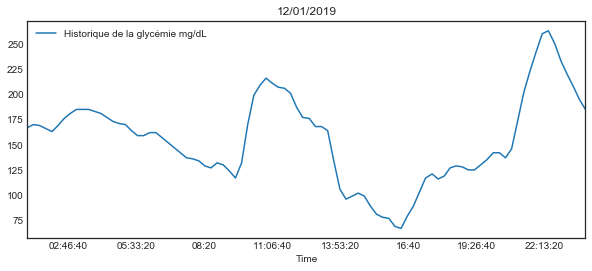

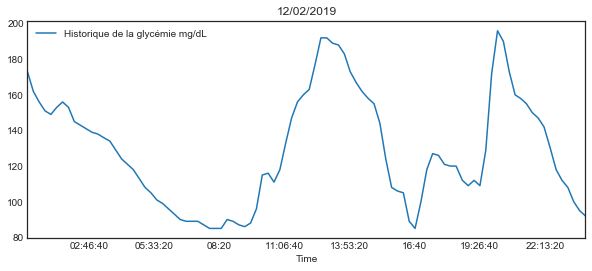

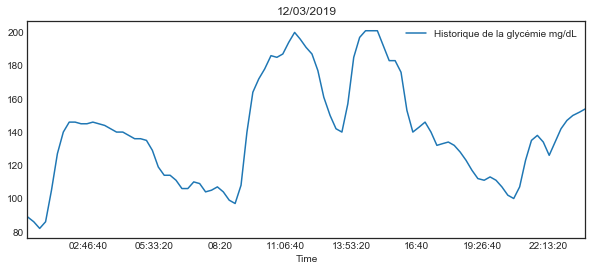

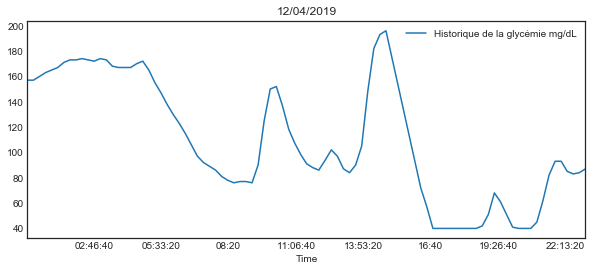

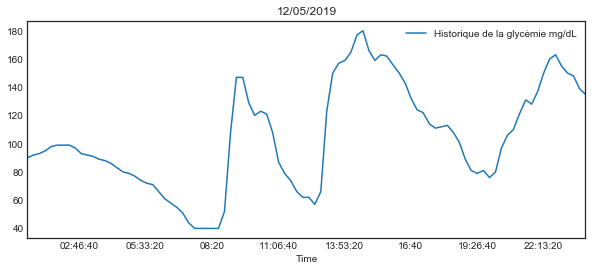

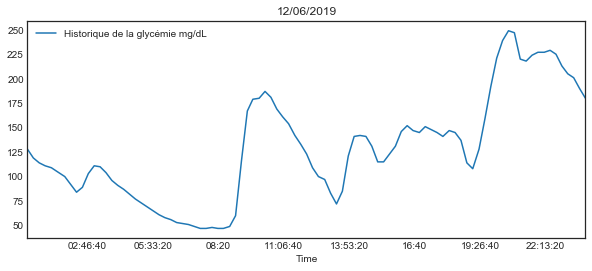

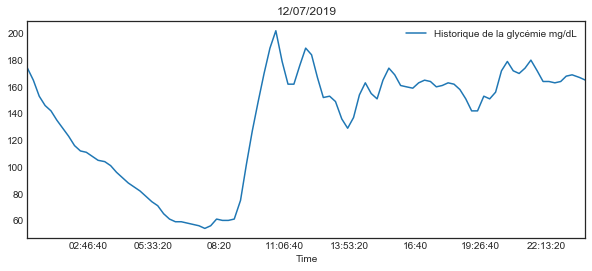

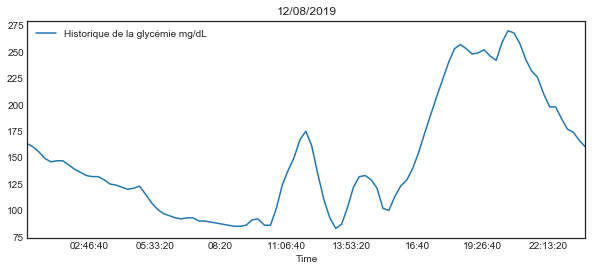

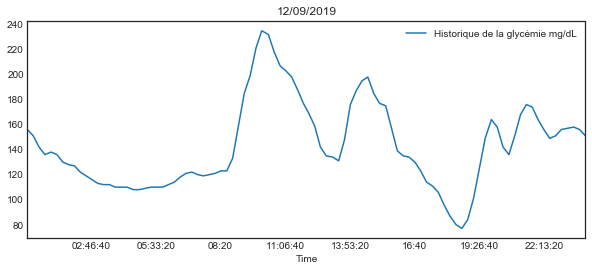

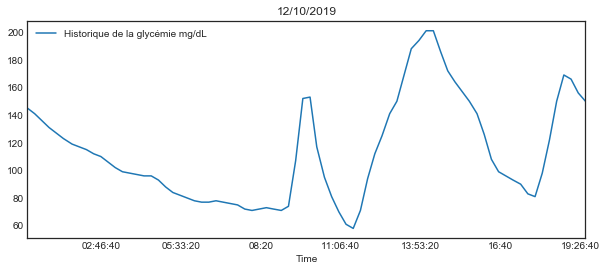

In [153]:
#Plot each days 
for df_glucose_day in df_glucose_by_days:
    title_ = df_glucose_day.iloc[0]['DateCp'].strftime("%m/%d/%Y")
    df_glucose_day.plot(x='Time', y='Historique de la glycémie mg/dL', figsize=(10,4), title=title_)

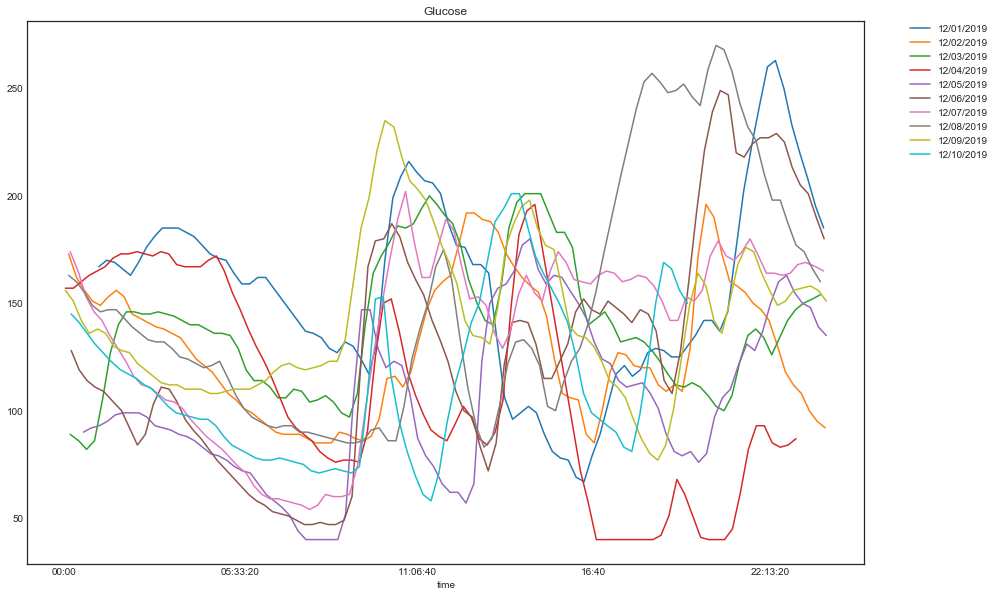

In [154]:
# Set the plot curve with markers and a title
#fig = plt.figure()
fig, ax = plt.subplots(figsize=(15,10))

for i in range(len(df_glucose_by_days)):
    df_glucose_day = df_glucose_by_days[i]
    title_ = df_glucose_day.iloc[0]['DateCp'].strftime("%m/%d/%Y")
    ax.plot(df_glucose_day['Time'], df_glucose_day['Historique de la glycémie mg/dL'], label=title_)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title('Glucose')
plt.show()

In [161]:
df_repas_sub

,Type d'enregistrement,Horodatage de l'appareil,Date2,Day,Time,Date+2H,Date+4H,Glucose mg/dL,Glucose 2H mg/dL,Glucose 4H mg/dL,Repas Type,Repas
Date,,,,,,,,,,,,
2019-12-10 20:01:00,5,12-10-2019 08:01 PM,2019-12-10 20:01:00,2019-12-10,20:01:00,2019-12-10 22:01:00,2019-12-11 00:01:00,150.0,150.0,150.0,Repas.DINNER,DINNER
2019-12-10 12:58:00,5,12-10-2019 12:58 PM,2019-12-10 12:58:00,2019-12-10,12:58:00,2019-12-10 14:58:00,2019-12-10 16:58:00,150.0,164.0,96.0,Repas.LUNCH,LUNCH
2019-12-10 09:06:00,5,12-10-2019 09:06 AM,2019-12-10 09:06:00,2019-12-10,09:06:00,2019-12-10 11:06:00,2019-12-10 13:06:00,71.0,70.0,150.0,Repas.BREAKFAST,BREAKFAST


In [167]:
df_repas_sub[df_repas_sub['Repas Type'] == Repas.BREAKFAST]['Time'][0]

datetime.time(9, 6)

In [199]:
#retourne les annotations correspondant a day (parametre)
def getAnnotationForMeals(day, df_repas): 

    annotation_repas = []

    current_date = day#df_glucose_day.iloc[0]['Day']
    mask = (df_repas['Day'] == current_date)
    df_repas_sub = df_repas.loc[mask]
        
    #if not df_repas_sub[df_repas_sub['Repas Type'] == Repas.BREAKFAST]['Time'].empty:
    #    BREAKFAST_time = df_repas_sub[df_repas_sub['Repas Type'] == Repas.BREAKFAST]['Time'][0]
    #    BREAKFAST_gluc = df_repas_sub[df_repas_sub['Repas Type'] == Repas.BREAKFAST]['Glucose mg/dL'][0]
    #    annotation_repas.append({"REPAS": 'BREAKFAST', "TIME": BREAKFAST_time, "GLUCOSE": BREAKFAST_gluc})
    
    if not df_repas_sub[df_repas_sub['Repas Type'] == Repas.LUNCH]['Time'].empty:
        LUNCH_time = df_repas_sub[df_repas_sub['Repas Type'] == Repas.LUNCH]['Time'][0]
        LUNCH_gluc = df_repas_sub[df_repas_sub['Repas Type'] == Repas.LUNCH]['Glucose mg/dL'][0]
        annotation_repas.append({"REPAS": 'LUNCH', "TIME": LUNCH_time, "GLUCOSE": LUNCH_gluc})
    
    if not df_repas_sub[df_repas_sub['Repas Type'] == Repas.DINNER]['Time'].empty:
        DINNER_time = df_repas_sub[df_repas_sub['Repas Type'] == Repas.DINNER]['Time'][0]
        DINNER_gluc = df_repas_sub[df_repas_sub['Repas Type'] == Repas.DINNER]['Glucose mg/dL'][0]
        annotation_repas.append({"REPAS": 'DINNER', "TIME": DINNER_time, "GLUCOSE": DINNER_gluc})
        
    return annotation_repas

In [200]:
#retourne les annotations correspondant au jour en parametre
def getAnnotationForDay(day, df_repas): 

    annotation_repas = []

    current_date = day#df_glucose_day.iloc[0]['Day']
    mask = (df_repas['Day'] == current_date)
    df_repas_sub = df_repas.loc[mask]


    if not df_repas_sub[df_repas_sub['Repas Type'] == Repas.BREAKFAST]['Time'].empty:
        FASTING_time = df_repas_sub[df_repas_sub['Repas Type'] == Repas.BREAKFAST]['Time'][0]
        FASTING_gluc = df_repas_sub[df_repas_sub['Repas Type'] == Repas.BREAKFAST]['Glucose mg/dL'][0]
        annotation_repas.append({"REPAS": 'FASTING', "TIME": FASTING_time, "GLUCOSE": FASTING_gluc})
        
    if not df_repas_sub[df_repas_sub['Repas Type'] == Repas.BREAKFAST]['Date+2H'].empty:
        BREAKFAST_2H_time = df_repas_sub[df_repas_sub['Repas Type'] == Repas.BREAKFAST]['Date+2H'][0].time()
        BREAKFAST_2H_gluc = df_repas_sub[df_repas_sub['Repas Type'] == Repas.BREAKFAST]['Glucose 2H mg/dL'][0]
        annotation_repas.append({"REPAS": 'BREAKFAST_2H', "TIME": BREAKFAST_2H_time, "GLUCOSE": BREAKFAST_2H_gluc})
    
    if not df_repas_sub[df_repas_sub['Repas Type'] == Repas.LUNCH]['Date+2H'].empty:
        LUNCH_2H_time = df_repas_sub[df_repas_sub['Repas Type'] == Repas.LUNCH]['Date+2H'][0].time()
        LUNCH_2H_gluc = df_repas_sub[df_repas_sub['Repas Type'] == Repas.LUNCH]['Glucose 2H mg/dL'][0]
        annotation_repas.append({"REPAS": 'LUNCH_2H', "TIME": LUNCH_2H_time, "GLUCOSE": LUNCH_2H_gluc})
    
    if not df_repas_sub[df_repas_sub['Repas Type'] == Repas.DINNER]['Date+2H'].empty:
        DINNER_2H_time = df_repas_sub[df_repas_sub['Repas Type'] == Repas.DINNER]['Date+2H'][0].time()
        DINNER_2H_gluc = df_repas_sub[df_repas_sub['Repas Type'] == Repas.DINNER]['Glucose 2H mg/dL'][0]
        annotation_repas.append({"REPAS": 'DINNER_2H', "TIME": DINNER_2H_time, "GLUCOSE": DINNER_2H_gluc})
    
    
    #BED_SNACK_time = df_repas_sub[df_repas_sub['Repas Type'] == Repas.DINNER]['Date+4H'][0].time()
    #BED_SNACK_gluc = df_repas_sub[df_repas_sub['Repas Type'] == Repas.DINNER]['Glucose 4H mg/dL'][0]
    #annotation_repas.append({"REPAS": 'BED_SNACK', "TIME": BED_SNACK_time, "GLUCOSE": BED_SNACK_gluc})
    #print(annotation_repas)
    
    return annotation_repas

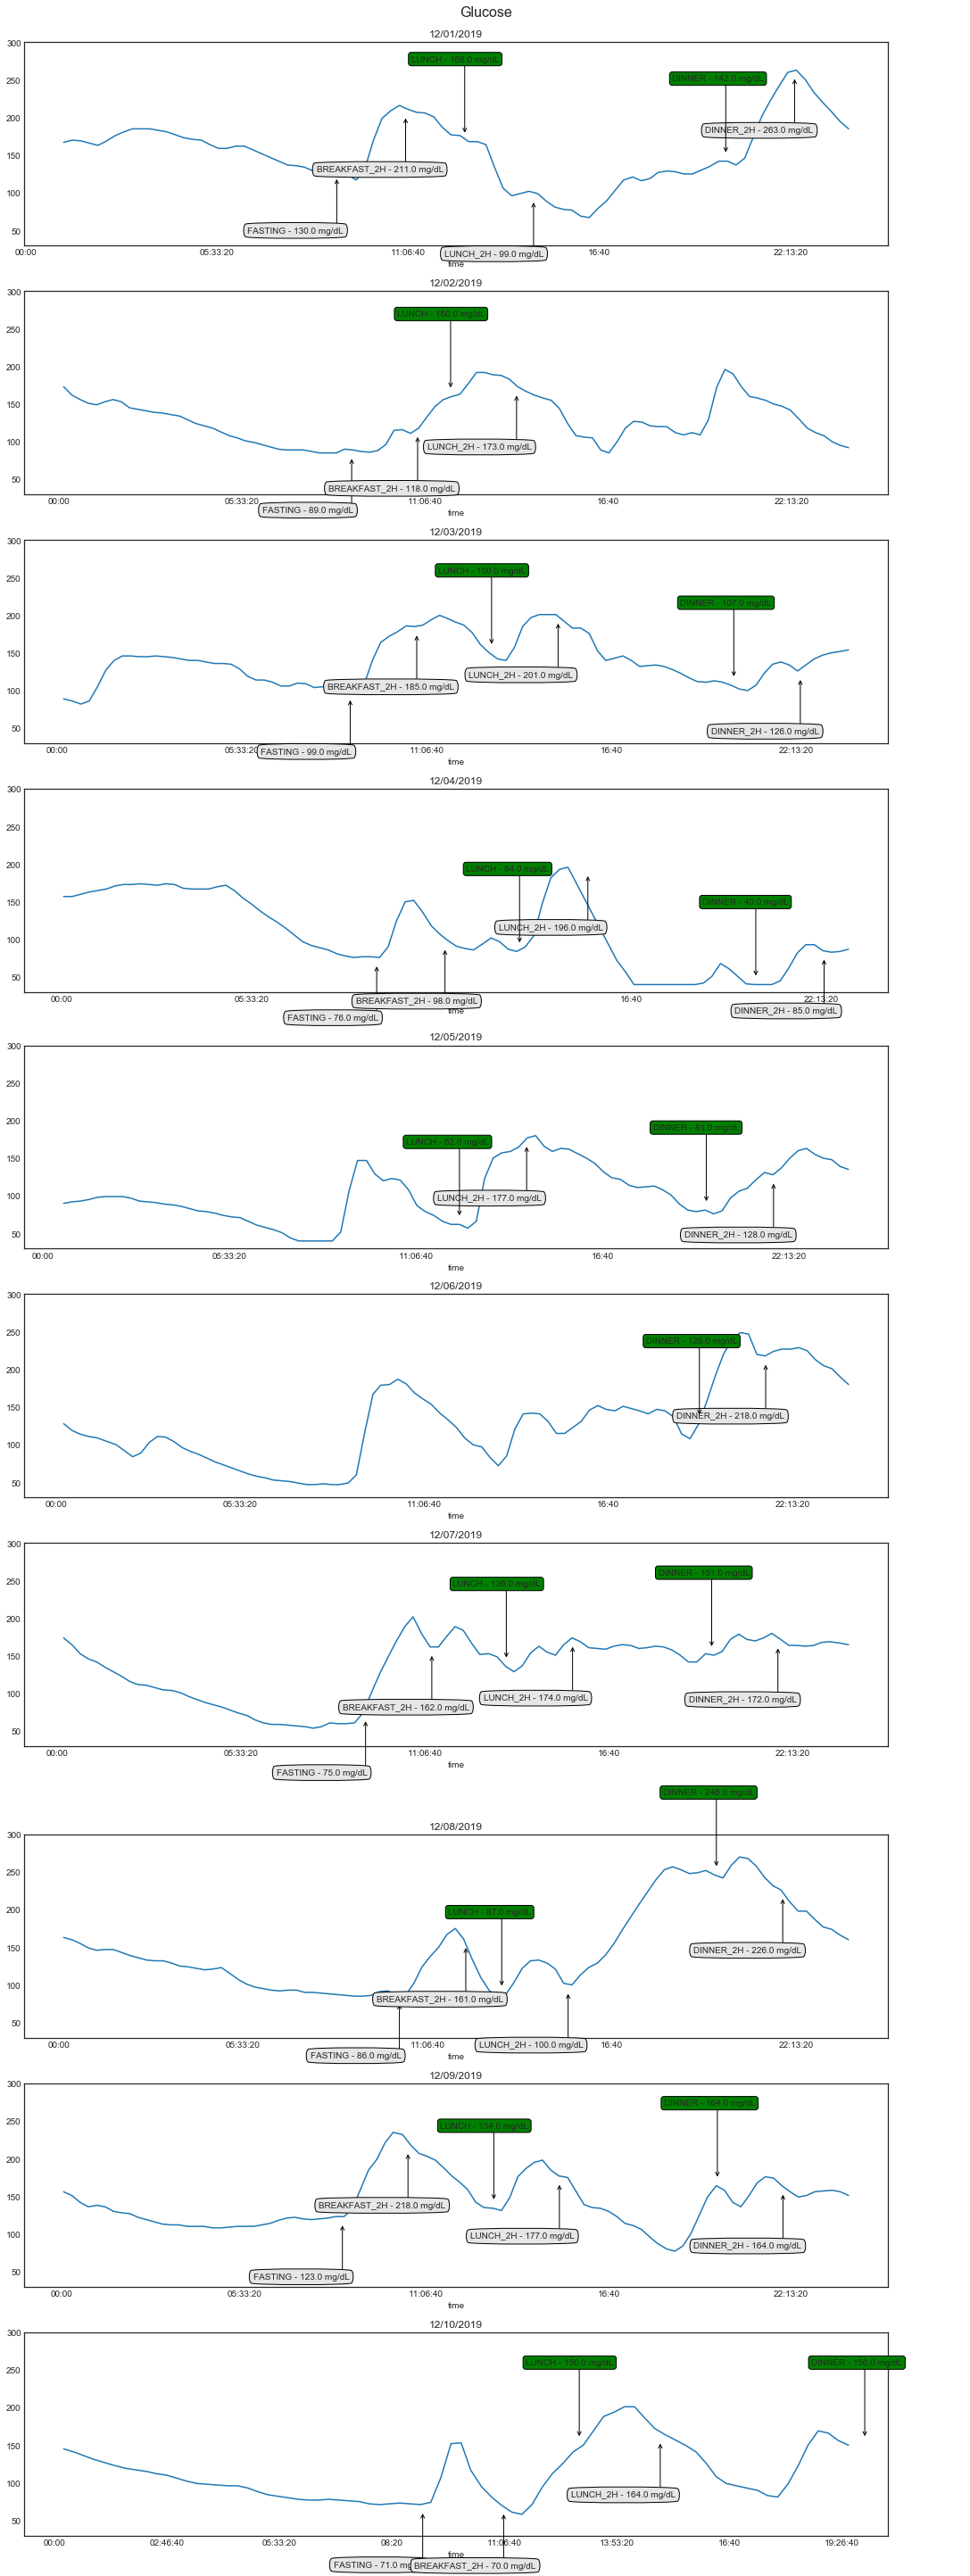

In [201]:
fig, axs = plt.subplots(len(df_glucose_by_days), 1, constrained_layout=True, figsize=(15,40)) #, 

for i in range(len(df_glucose_by_days)):
    df_glucose_day = df_glucose_by_days[i]
    title_ = df_glucose_day.iloc[0]['DateCp'].strftime("%m/%d/%Y")
    axs[i].plot(df_glucose_day['Time'], df_glucose_day['Historique de la glycémie mg/dL'])
    axs[i].set_title(title_)
    axs[i].set_ylim([30, 300])
    #repas = 'LUNCH'
    #heure = df_glucose_day.iloc[0]['Time']
    #glucose = df_glucose_day.iloc[0]['Historique de la glycémie mg/dL']
    
    annotation_repas_ = getAnnotationForDay(df_glucose_day.iloc[0]['Day'], df_repas)
    
    for annot in annotation_repas_:
        repas = annot["REPAS"] + ' - ' + str(annot["GLUCOSE"]) + ' mg/dL'
        heure = annot["TIME"]
        glucose = annot["GLUCOSE"]
        
        axs[i].annotate(repas, xy=(heure, glucose),  xycoords='data',
                xytext=(-100, -70), textcoords='offset points',
                bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
                arrowprops=dict(arrowstyle="->", shrinkA=0, shrinkB=10, connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        
        
    annotation_repas_time =  getAnnotationForMeals(df_glucose_day.iloc[0]['Day'], df_repas)
    for annot in annotation_repas_time : 
        
        repas = annot["REPAS"] + ' - ' + str(annot["GLUCOSE"]) + ' mg/dL'
        heure = annot["TIME"]
        glucose = annot["GLUCOSE"]
        
        axs[i].annotate(repas,
            xy=(heure, glucose), xycoords='data',
            xytext=(-60, 90), textcoords='offset points',
            bbox=dict(boxstyle="round",  fc='green'),
            arrowprops=dict(arrowstyle="->",shrinkA=0, shrinkB=10, connectionstyle="angle,angleA=0,angleB=90,rad=10"))


        #plt.title('Glucose')
fig.suptitle('Glucose', fontsize=16)
plt.show()

# Export du tableau de glycemie

In [101]:
df_repas.head(5)

,Type d'enregistrement,Horodatage de l'appareil,Date2,Date+2H,Date+4H,Glucose mg/dL,Glucose 2H mg/dL,Glucose 4H mg/dL
Date,,,,,,,,
2019-12-10 20:01:00,5,12-10-2019 08:01 PM,2019-12-10 20:01:00,2019-12-10 22:01:00,2019-12-11 00:01:00,150.0,150.0,150.0
2019-12-10 12:58:00,5,12-10-2019 12:58 PM,2019-12-10 12:58:00,2019-12-10 14:58:00,2019-12-10 16:58:00,150.0,164.0,96.0
2019-12-10 09:06:00,5,12-10-2019 09:06 AM,2019-12-10 09:06:00,2019-12-10 11:06:00,2019-12-10 13:06:00,71.0,70.0,150.0
2019-12-09 19:59:00,5,12-09-2019 07:59 PM,2019-12-09 19:59:00,2019-12-09 21:59:00,2019-12-09 23:59:00,164.0,164.0,151.0
2019-12-09 13:10:00,5,12-09-2019 01:10 PM,2019-12-09 13:10:00,2019-12-09 15:10:00,2019-12-09 17:10:00,134.0,177.0,114.0


In [104]:
df_out = df_repas[['DateCp', 'Glucose mg/dL', 'Glucose 2H mg/dL', 'Glucose 4H mg/dL', 'Repas']]
df_out.head(10)

,Date2,Glucose mg/dL,Glucose 2H mg/dL,Glucose 4H mg/dL,Repas
Date,,,,,
2019-12-10 20:01:00,2019-12-10 20:01:00,150.0,150.0,150.0,DINNER
2019-12-10 12:58:00,2019-12-10 12:58:00,150.0,164.0,96.0,LUNCH
2019-12-10 09:06:00,2019-12-10 09:06:00,71.0,70.0,150.0,BREAKFAST
2019-12-09 19:59:00,2019-12-09 19:59:00,164.0,164.0,151.0,DINNER
2019-12-09 13:10:00,2019-12-09 13:10:00,134.0,177.0,114.0,LUNCH
2019-12-09 08:33:00,2019-12-09 08:33:00,123.0,218.0,142.0,BREAKFAST
2019-12-08 19:49:00,2019-12-08 19:49:00,246.0,226.0,160.0,DINNER
2019-12-08 13:21:00,2019-12-08 13:21:00,87.0,100.0,190.0,LUNCH
2019-12-08 10:16:00,2019-12-08 10:16:00,86.0,161.0,132.0,BREAKFAST


In [157]:
df_out.groupby([df_out.index.day, 'Repas']).first()

Date2  Glucose mg/dL  Glucose 2H mg/dL  \
Date Repas                                                            
1    BREAKFAST 2019-12-01 09:02:00          130.0             211.0   
     DINNER    2019-12-01 20:20:00          142.0             263.0   
     LUNCH     2019-12-01 12:45:00          168.0              99.0   
2    BREAKFAST 2019-12-02 08:53:00           89.0             118.0   
     LUNCH     2019-12-02 11:53:00          160.0             173.0   
3    BREAKFAST 2019-12-03 08:49:00           99.0             185.0   
     DINNER    2019-12-03 20:21:00          107.0             126.0   
     LUNCH     2019-12-03 13:04:00          150.0             201.0   
4    BREAKFAST 2019-12-04 09:13:00           76.0              98.0   
     DINNER    2019-12-04 20:19:00           40.0              85.0   
     LUNCH     2019-12-04 13:24:00           84.0             196.0   
5    DINNER    2019-12-05 19:45:00           81.0             128.0   
     LUNCH     2019-12-05 12:24:00           62.0             177.0   
6    DINNER    2019-12-06 19:25:00          128.0             218.0   
7    BREAKFAST 2019-12-07 09:19:00           75.0             162.0   
     DINNER    2019-12-07 19:46:00          151.0             172.0   
     LUNCH     2019-12-07 13:34:00          136.0             174.0   
8    BREAKFAST 2019-12-08 10:16:00           86.0             161.0   
     DINNER    2019-12-08 19:49:00          246.0             226.0   
     LUNCH     2019-12-08 13:21:00           87.0             100.0   
9    BREAKFAST 2019-12-09 08:33:00          123.0             218.0   
     DINNER    2019-12-09 19:59:00          164.0             164.0   
     LUNCH     2019-12-09 13:10:00          134.0             177.0   
10   BREAKFAST 2019-12-10 09:06:00           71.0              70.0   
     DINNER    2019-12-10 20:01:00          150.0             150.0   
     LUNCH     2019-12-10 12:58:00          150.0             164.0   

                Glucose 4H mg/dL  
Date Repas                        
1    BREAKFAST             168.0  
     DINNER                162.0  
     LUNCH                  89.0  
2    BREAKFAST             192.0  
     LUNCH                 106.0  
3    BREAKFAST             161.0  
     DINNER                157.0  
     LUNCH                 146.0  
4    BREAKFAST              84.0  
     DINNER                 90.0  
     LUNCH                  40.0  
5    DINNER                139.0  
     LUNCH                 143.0  
6    DINNER                201.0  
7    BREAKFAST             149.0  
     DINNER                167.0  
     LUNCH                 160.0  
8    BREAKFAST             132.0  
     DINNER                160.0  
     LUNCH                 190.0  
9    BREAKFAST             142.0  
     DINNER                151.0  
     LUNCH                 114.0  
10   BREAKFAST             150.0  
     DINNER                150.0  
     LUNCH                  96.0

In [74]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
# Also set the default datetime and date formats.
writer = pd.ExcelWriter("output.xlsx",
                        engine='xlsxwriter',
                        datetime_format='yyyy-mm-dd hh:mm:ss',
                        date_format='yyyy-mm-dd')

# Convert the dataframe to an XlsxWriter Excel object.
df_out.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()